<h1 style="font-size: 36px;">Timing task</h1>


In this notebook, we illustrate how the reservoir is tested for the timing task.
The reservoir is given a step function as input function. The network is then trained to output a pulse n time steps after the step in the step function. 

In [2]:
#Import packages
import sys

sys.path.append('..\..\QRC')
sys.path.append('..\..\QRC\Timing_task')
import Timing_task

import numpy as np
import matplotlib.pyplot as plt

import importlib
import Timing_task
importlib.reload(Timing_task)
from Timing_task import Timing_task

<h1 style="font-size: 20px;">Example of Timing Tasks</h1>

Time to solve ode:  0.1757521629333496
Number of iterations (nfev):  476
Total time to solve system:  0.1043555736541748
Average time to solve system 0.00021923439843314036


Running Ridge-3: 100%|██████████| 1000/1000 [00:00<00:00, 79436.07it/s]


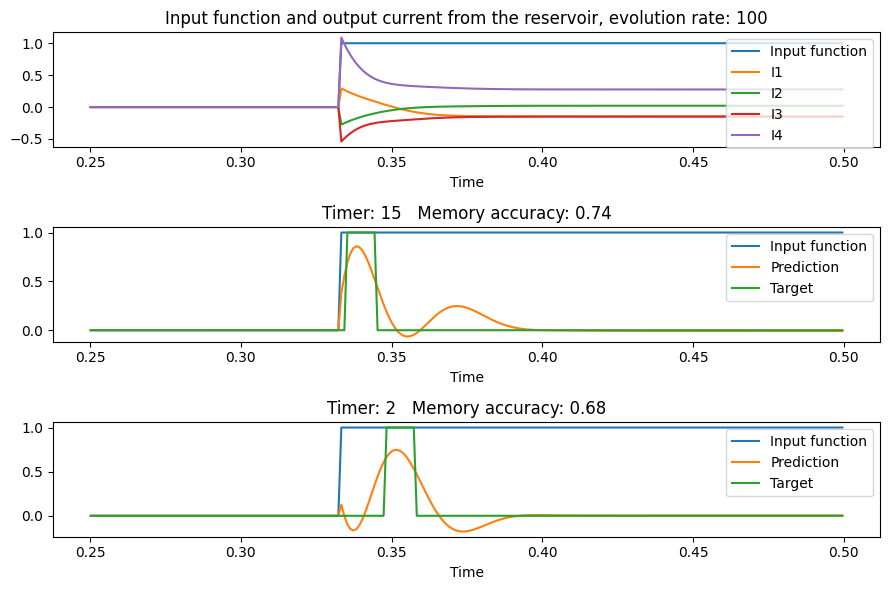

In [4]:
#Create timing task object
reservoir_seed =  1# Seed for reproducability
evolution_rate = 100 # Evolution rate - scaling parameter of the Lindbladian
tt = Timing_task(evolution_rate,  reservoir_seed=reservoir_seed)

#Define what tests to run
timers = [2,15]

#Run tests
ma_list, mse_list, target_list, prediction_list = [], [], [], []
for timer in timers:
    ma, mse, predictions, target = tt.run_test(timer)
    ma_list.append(ma)
    mse_list.append(mse)
    target_list.append(target)
    prediction_list.append(predictions)


#Plot results
fig, axs = plt.subplots(len(timers)+1, 1, figsize=(9, 6))

#Parameters for the plot
start = 250
end = 500
scaling_factor = 5

#Plot the input function and the output current from the reservoir
t_range = tt.t_range[start:end]
axs[0].plot(t_range, tt.get_input_func()(t_range))
axs[0].plot(t_range, tt.I[start:end]*scaling_factor)
axs[0].legend(['Input function', 'I1', 'I2', 'I3', 'I4'])
axs[0].set_xlabel('Time')
axs[0].set_title(f'Input function and output current from the reservoir, evolution rate: {evolution_rate}')

#Plot the results from the tests
for i in range(len(timers)):
    timer = timers[i-1]
    axs[i+1].plot(t_range, tt.get_input_func()(t_range), label = 'Input function')
    axs[i+1].plot(t_range, prediction_list[i][start:end], label = 'Prediction')
    axs[i+1].plot(t_range, target_list[i][start:end], label = 'Target')
    
    axs[i+1].set_xlabel('Time')
    axs[i+1].set_title('Timer: ' + str(timer) + '   Memory accuracy: ' + str(np.round(ma_list[i], 2)))
    axs[i+1].legend(loc= 'upper right')
fig.tight_layout()

<h1 style="font-size: 20px;">Timing Task Performance For 1 Random Reservoir</h1>

In [13]:
timers = list(range(70)) # Timers to test
evolution_rates = [100, 200, 300] # Evolution rates to test

ma_list= np.zeros((len(evolution_rates), len(timers)))

seed =20 # Reservoir seed for reproducability
for j in range(len(evolution_rates)):
    tt = Timing_task(evolution_rates[j], steps=1000, reservoir_seed=seed)
    for i in range(len(timers)):
        ma, mse, predictions, target = tt.run_test(timers[i])
        ma_list[j,i] = ma

Time to solve ode:  0.1533370018005371
Number of iterations (nfev):  509
Total time to solve system:  0.09426617622375488
Average time to solve system 0.00018519877450639467


Running Ridge-4273: 100%|██████████| 1000/1000 [00:00<00:00, 71569.05it/s]


Time to solve ode:  0.3398892879486084
Number of iterations (nfev):  1037
Total time to solve system:  0.22541356086730957
Average time to solve system 0.00021737083979489832


Running Ridge-4343: 100%|██████████| 1000/1000 [00:00<00:00, 83943.16it/s]


Time to solve ode:  0.46823644638061523
Number of iterations (nfev):  1520
Total time to solve system:  0.32639455795288086
Average time to solve system 0.00021473326181110583


Running Ridge-4413: 100%|██████████| 1000/1000 [00:00<00:00, 78273.85it/s]


Text(0.5, 1.0, 'Timing task for a random reservoir with different evolution rates')

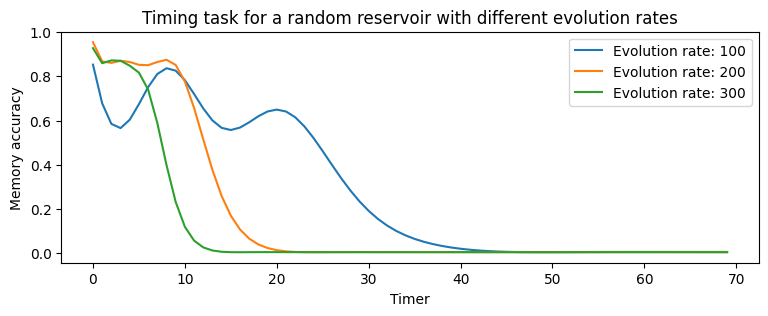

In [14]:
#Plot results 
plt.figure(figsize=(9, 3))
for i in range(len(evolution_rates)):
    plt.plot(timers, ma_list[i], label = 'Evolution rate: ' + str(evolution_rates[i]))    
plt.legend()
plt.xlabel('Timer')
plt.ylabel('Memory accuracy')
plt.title('Timing task for a random reservoir with different evolution rates')

<h1 style="font-size: 20px;">Timing Task Performance For 20 Random Reservoirs</h1>

In [5]:
repetitions = 20 #Number of reservoirs to test
reservoir_seeds = np.random.randint(0, 1000, repetitions) #Seeds for the reservoirs, so that the same 20 are used for all timers

timers = list(range(70)) #All timers
evolution_rates = [100, 200] #Different evolution rates to test

results_ma = np.zeros((len(evolution_rates), repetitions, len(timers)))
results_mse = np.zeros((len(evolution_rates), repetitions, len(timers)))


#Test for different evolution rates
for i in range(len(evolution_rates)):
    
    #Test for different reservoirs
    for j in range(repetitions):
        reservoir_seed=int(reservoir_seeds[j])
        tt = Timing_task(evolution_rates[i], steps=1000, reservoir_seed=reservoir_seed)
        
        #Test for different timers tasks
        for k in range(len(timers)):
            ma, mse, predictions, target = tt.run_test(timers[k])
            
            results_ma[i, j, k] = ma
            results_mse[i, j, k] = mse

Time to solve ode:  0.1565694808959961
Number of iterations (nfev):  518
Total time to solve system:  0.0997927188873291
Average time to solve system 0.0001926500364620253


Running Ridge-73: 100%|██████████| 1000/1000 [00:00<00:00, 78964.98it/s]


Time to solve ode:  0.20525169372558594
Number of iterations (nfev):  452
Total time to solve system:  0.15137720108032227
Average time to solve system 0.0003349053121246068


Running Ridge-143: 100%|██████████| 1000/1000 [00:00<00:00, 105543.63it/s]


Time to solve ode:  0.1699538230895996
Number of iterations (nfev):  557
Total time to solve system:  0.09804964065551758
Average time to solve system 0.00017603167083575866


Running Ridge-213: 100%|██████████| 1000/1000 [00:00<00:00, 49589.78it/s]


Time to solve ode:  0.16385626792907715
Number of iterations (nfev):  512
Total time to solve system:  0.09625387191772461
Average time to solve system 0.00018799584358930588


Running Ridge-283: 100%|██████████| 1000/1000 [00:00<00:00, 81800.18it/s]


Time to solve ode:  0.13539481163024902
Number of iterations (nfev):  452
Total time to solve system:  0.06904172897338867
Average time to solve system 0.00015274718799422273


Running Ridge-353: 100%|██████████| 1000/1000 [00:00<00:00, 184324.50it/s]


Time to solve ode:  0.17299675941467285
Number of iterations (nfev):  551
Total time to solve system:  0.11536264419555664
Average time to solve system 0.00020936959019157285


Running Ridge-423: 100%|██████████| 1000/1000 [00:00<00:00, 64396.98it/s]


Time to solve ode:  0.14162707328796387
Number of iterations (nfev):  512
Total time to solve system:  0.07474350929260254
Average time to solve system 0.00014598341658711433


Running Ridge-493: 100%|██████████| 1000/1000 [00:00<00:00, 63992.19it/s]


Time to solve ode:  0.13052821159362793
Number of iterations (nfev):  440
Total time to solve system:  0.08744215965270996
Average time to solve system 0.00019873218102888627


Running Ridge-563: 100%|██████████| 1000/1000 [00:00<00:00, 42080.22it/s]


Time to solve ode:  0.1516554355621338
Number of iterations (nfev):  485
Total time to solve system:  0.11289095878601074
Average time to solve system 0.00023276486347631082


Running Ridge-633: 100%|██████████| 1000/1000 [00:00<00:00, 99247.63it/s]


Time to solve ode:  0.18056631088256836
Number of iterations (nfev):  530
Total time to solve system:  0.11811566352844238
Average time to solve system 0.00022285974250649507


Running Ridge-703: 100%|██████████| 1000/1000 [00:00<00:00, 65548.29it/s]


Time to solve ode:  0.16362547874450684
Number of iterations (nfev):  530
Total time to solve system:  0.08916616439819336
Average time to solve system 0.0001682380460343271


Running Ridge-773: 100%|██████████| 1000/1000 [00:00<00:00, 86607.28it/s]


Time to solve ode:  0.15296339988708496
Number of iterations (nfev):  497
Total time to solve system:  0.11510682106018066
Average time to solve system 0.00023160326169050435


Running Ridge-843: 100%|██████████| 1000/1000 [00:00<00:00, 97544.22it/s]


Time to solve ode:  0.1773383617401123
Number of iterations (nfev):  590
Total time to solve system:  0.09787774085998535
Average time to solve system 0.0001658944760338735


Running Ridge-913: 100%|██████████| 1000/1000 [00:00<00:00, 80606.99it/s]


Time to solve ode:  0.19546842575073242
Number of iterations (nfev):  656
Total time to solve system:  0.12188553810119629
Average time to solve system 0.00018580112515426264


Running Ridge-983: 100%|██████████| 1000/1000 [00:00<00:00, 87563.76it/s]


Time to solve ode:  0.17446327209472656
Number of iterations (nfev):  539
Total time to solve system:  0.13220429420471191
Average time to solve system 0.0002452769836822113


Running Ridge-1053: 100%|██████████| 1000/1000 [00:00<00:00, 63453.92it/s]


Time to solve ode:  0.14767813682556152
Number of iterations (nfev):  503
Total time to solve system:  0.09300494194030762
Average time to solve system 0.00018490048099464735


Running Ridge-1123: 100%|██████████| 1000/1000 [00:00<00:00, 59949.46it/s]


Time to solve ode:  0.17194104194641113
Number of iterations (nfev):  512
Total time to solve system:  0.11051511764526367
Average time to solve system 0.0002158498391509056


Running Ridge-1193: 100%|██████████| 1000/1000 [00:00<00:00, 54902.86it/s]


Time to solve ode:  0.20191431045532227
Number of iterations (nfev):  656
Total time to solve system:  0.12738609313964844
Average time to solve system 0.0001941861175909275


Running Ridge-1263: 100%|██████████| 1000/1000 [00:00<00:00, 57036.65it/s]


Time to solve ode:  0.15441513061523438
Number of iterations (nfev):  494
Total time to solve system:  0.11262369155883789
Average time to solve system 0.00022798318129319412


Running Ridge-1333: 100%|██████████| 1000/1000 [00:00<00:00, 71704.86it/s]


Time to solve ode:  0.17404651641845703
Number of iterations (nfev):  554
Total time to solve system:  0.11359810829162598
Average time to solve system 0.00020505073698849453


Running Ridge-1403: 100%|██████████| 1000/1000 [00:00<00:00, 47171.00it/s]


Time to solve ode:  0.3113443851470947
Number of iterations (nfev):  1040
Total time to solve system:  0.18976116180419922
Average time to solve system 0.0001824626555809608


Running Ridge-1473: 100%|██████████| 1000/1000 [00:00<00:00, 56100.58it/s]


Time to solve ode:  0.2902712821960449
Number of iterations (nfev):  932
Total time to solve system:  0.185150146484375
Average time to solve system 0.00019865895545533797


Running Ridge-1543: 100%|██████████| 1000/1000 [00:00<00:00, 38324.80it/s]


Time to solve ode:  0.7223854064941406
Number of iterations (nfev):  1118
Total time to solve system:  0.448911190032959
Average time to solve system 0.00040153058142482917


Running Ridge-1613: 100%|██████████| 1000/1000 [00:00<00:00, 66031.23it/s]


Time to solve ode:  0.2996559143066406
Number of iterations (nfev):  1004
Total time to solve system:  0.19559431076049805
Average time to solve system 0.000194815050558265


Running Ridge-1683: 100%|██████████| 1000/1000 [00:00<00:00, 64211.64it/s]


Time to solve ode:  0.275923490524292
Number of iterations (nfev):  932
Total time to solve system:  0.17713546752929688
Average time to solve system 0.00019005951451641295


Running Ridge-1753: 100%|██████████| 1000/1000 [00:00<00:00, 54203.98it/s]


Time to solve ode:  0.34985923767089844
Number of iterations (nfev):  1175
Total time to solve system:  0.23525643348693848
Average time to solve system 0.00020021824126547955


Running Ridge-1823: 100%|██████████| 1000/1000 [00:00<00:00, 65936.77it/s]


Time to solve ode:  0.33432459831237793
Number of iterations (nfev):  1028
Total time to solve system:  0.2231884002685547
Average time to solve system 0.00021710933878264075


Running Ridge-1893: 100%|██████████| 1000/1000 [00:00<00:00, 263444.76it/s]


Time to solve ode:  0.2793436050415039
Number of iterations (nfev):  938
Total time to solve system:  0.1642289161682129
Average time to solve system 0.00017508413237549348


Running Ridge-1963: 100%|██████████| 1000/1000 [00:00<00:00, 69415.69it/s]


Time to solve ode:  0.28313350677490234
Number of iterations (nfev):  959
Total time to solve system:  0.17887020111083984
Average time to solve system 0.00018651741513121985


Running Ridge-2033: 100%|██████████| 1000/1000 [00:00<00:00, 45464.25it/s]


Time to solve ode:  0.3533620834350586
Number of iterations (nfev):  1076
Total time to solve system:  0.20780611038208008
Average time to solve system 0.00019312835537368036


Running Ridge-2103: 100%|██████████| 1000/1000 [00:00<00:00, 64529.74it/s]


Time to solve ode:  0.3232583999633789
Number of iterations (nfev):  1058
Total time to solve system:  0.20886468887329102
Average time to solve system 0.0001974146397668157


Running Ridge-2173: 100%|██████████| 1000/1000 [00:00<00:00, 53065.59it/s]


Time to solve ode:  0.3045620918273926
Number of iterations (nfev):  1001
Total time to solve system:  0.17523956298828125
Average time to solve system 0.00017506449848979147


Running Ridge-2243: 100%|██████████| 1000/1000 [00:00<00:00, 68477.31it/s]


Time to solve ode:  0.35438990592956543
Number of iterations (nfev):  1160
Total time to solve system:  0.2505004405975342
Average time to solve system 0.00021594865568752946


Running Ridge-2313: 100%|██████████| 1000/1000 [00:00<00:00, 44873.74it/s]


Time to solve ode:  0.4073355197906494
Number of iterations (nfev):  1364
Total time to solve system:  0.28269004821777344
Average time to solve system 0.0002072507684881037


Running Ridge-2383: 100%|██████████| 1000/1000 [00:00<00:00, 36411.42it/s]


Time to solve ode:  0.32826852798461914
Number of iterations (nfev):  1082
Total time to solve system:  0.23810124397277832
Average time to solve system 0.0002200566025626417


Running Ridge-2453: 100%|██████████| 1000/1000 [00:00<00:00, 70598.10it/s]


Time to solve ode:  0.3157951831817627
Number of iterations (nfev):  1022
Total time to solve system:  0.19632768630981445
Average time to solve system 0.00019210145431488695


Running Ridge-2523: 100%|██████████| 1000/1000 [00:00<00:00, 76758.30it/s]


Time to solve ode:  0.3143301010131836
Number of iterations (nfev):  1046
Total time to solve system:  0.2257695198059082
Average time to solve system 0.000215840841114635


Running Ridge-2593: 100%|██████████| 1000/1000 [00:00<00:00, 82983.22it/s]


Time to solve ode:  0.4266066551208496
Number of iterations (nfev):  1424
Total time to solve system:  0.28508949279785156
Average time to solve system 0.00020020329550410925


Running Ridge-2663: 100%|██████████| 1000/1000 [00:00<00:00, 57606.15it/s]


Time to solve ode:  0.2952382564544678
Number of iterations (nfev):  959
Total time to solve system:  0.18425226211547852
Average time to solve system 0.00019212957467724557


Running Ridge-2733: 100%|██████████| 1000/1000 [00:00<00:00, 64817.94it/s]


Time to solve ode:  0.32483553886413574
Number of iterations (nfev):  1085
Total time to solve system:  0.2187185287475586
Average time to solve system 0.00020158389746318764


Running Ridge-2803: 100%|██████████| 1000/1000 [00:00<00:00, 75389.66it/s]


Time to solve ode:  0.4594759941101074
Number of iterations (nfev):  1541
Total time to solve system:  0.31241655349731445
Average time to solve system 0.00020273624496905545


Running Ridge-2873: 100%|██████████| 1000/1000 [00:00<00:00, 77879.98it/s]


Time to solve ode:  0.4116840362548828
Number of iterations (nfev):  1358
Total time to solve system:  0.2905309200286865
Average time to solve system 0.00021394029457193412


Running Ridge-2943: 100%|██████████| 1000/1000 [00:00<00:00, 68485.14it/s]


Time to solve ode:  0.5039858818054199
Number of iterations (nfev):  1664
Total time to solve system:  0.3538796901702881
Average time to solve system 0.0002126680830350289


Running Ridge-3013: 100%|██████████| 1000/1000 [00:00<00:00, 79323.40it/s]


Time to solve ode:  0.466855525970459
Number of iterations (nfev):  1457
Total time to solve system:  0.29248762130737305
Average time to solve system 0.0002007464799638799


Running Ridge-3083: 100%|██████████| 1000/1000 [00:00<00:00, 63617.53it/s]


Time to solve ode:  0.41434812545776367
Number of iterations (nfev):  1358
Total time to solve system:  0.2552831172943115
Average time to solve system 0.0001879846224553104


Running Ridge-3153: 100%|██████████| 1000/1000 [00:00<00:00, 57962.00it/s]


Time to solve ode:  0.5827858448028564
Number of iterations (nfev):  1865
Total time to solve system:  0.3943963050842285
Average time to solve system 0.00021147254964301796


Running Ridge-3223: 100%|██████████| 1000/1000 [00:00<00:00, 76268.39it/s]


Time to solve ode:  0.45122218132019043
Number of iterations (nfev):  1490
Total time to solve system:  0.2865006923675537
Average time to solve system 0.00019228234387084142


Running Ridge-3293: 100%|██████████| 1000/1000 [00:00<00:00, 109680.81it/s]


Time to solve ode:  0.42401552200317383
Number of iterations (nfev):  1391
Total time to solve system:  0.29766082763671875
Average time to solve system 0.00021399053029239306


Running Ridge-3363: 100%|██████████| 1000/1000 [00:00<00:00, 78843.26it/s]


Time to solve ode:  0.43210673332214355
Number of iterations (nfev):  1436
Total time to solve system:  0.29396677017211914
Average time to solve system 0.0002047122354959047


Running Ridge-3433: 100%|██████████| 1000/1000 [00:00<00:00, 71122.45it/s]


Time to solve ode:  0.4678189754486084
Number of iterations (nfev):  1574
Total time to solve system:  0.2808835506439209
Average time to solve system 0.00017845206521214797


Running Ridge-3503: 100%|██████████| 1000/1000 [00:00<00:00, 56072.08it/s]


Time to solve ode:  0.4590606689453125
Number of iterations (nfev):  1520
Total time to solve system:  0.30901193618774414
Average time to solve system 0.00020329732643930534


Running Ridge-3573: 100%|██████████| 1000/1000 [00:00<00:00, 102607.92it/s]


Time to solve ode:  0.4654097557067871
Number of iterations (nfev):  1514
Total time to solve system:  0.2892494201660156
Average time to solve system 0.00019104981516909883


Running Ridge-3643: 100%|██████████| 1000/1000 [00:00<00:00, 63174.84it/s]


Time to solve ode:  0.5888969898223877
Number of iterations (nfev):  1676
Total time to solve system:  0.3788783550262451
Average time to solve system 0.00022606107101804602


Running Ridge-3713: 100%|██████████| 1000/1000 [00:00<00:00, 510815.25it/s]


Time to solve ode:  0.6447241306304932
Number of iterations (nfev):  2036
Total time to solve system:  0.42157554626464844
Average time to solve system 0.00020706068087654637


Running Ridge-3783: 100%|██████████| 1000/1000 [00:00<00:00, 65521.67it/s]


Time to solve ode:  0.5056946277618408
Number of iterations (nfev):  1574
Total time to solve system:  0.3148224353790283
Average time to solve system 0.00020001425373508789


Running Ridge-3853: 100%|██████████| 1000/1000 [00:00<00:00, 80580.66it/s]


Time to solve ode:  0.44522953033447266
Number of iterations (nfev):  1481
Total time to solve system:  0.2791402339935303
Average time to solve system 0.00018848091424276183


Running Ridge-3923: 100%|██████████| 1000/1000 [00:00<00:00, 105956.90it/s]


Time to solve ode:  0.47890496253967285
Number of iterations (nfev):  1574
Total time to solve system:  0.329601526260376
Average time to solve system 0.00020940376509553748


Running Ridge-3993: 100%|██████████| 1000/1000 [00:00<00:00, 84402.62it/s]


Time to solve ode:  0.6518003940582275
Number of iterations (nfev):  2147
Total time to solve system:  0.38689494132995605
Average time to solve system 0.00018020258096411554


Running Ridge-4063: 100%|██████████| 1000/1000 [00:00<00:00, 79436.07it/s]


Time to solve ode:  0.42760515213012695
Number of iterations (nfev):  1427
Total time to solve system:  0.2696256637573242
Average time to solve system 0.00018894580501564417


Running Ridge-4133: 100%|██████████| 1000/1000 [00:00<00:00, 105207.41it/s]


Time to solve ode:  0.5084383487701416
Number of iterations (nfev):  1580
Total time to solve system:  0.34966373443603516
Average time to solve system 0.0002213061610354653


Running Ridge-4203: 100%|██████████| 1000/1000 [00:00<00:00, 88554.68it/s]


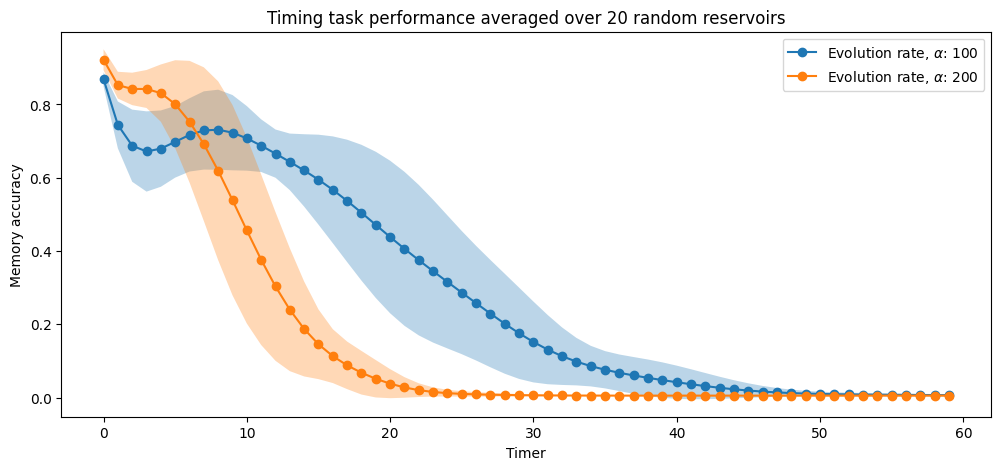

In [10]:
#Plot results
plt.figure(figsize=(12, 5))
for i in range(0,2):
    x_data = timers[:60]
    y_data = results_ma[i, :, :][:, :60]

    mean = np.mean(y_data, axis=0)
    std = np.std(y_data, axis=0)
    plt.title('Timing task performance averaged over 20 random reservoirs')
    plt.plot(x_data, mean, linestyle='-', marker='o', label = r'Evolution rate, $\alpha$: ' + str(evolution_rates[i]))
    plt.fill_between(x_data, mean - std, mean + std, alpha=0.3)

plt.legend()
plt.xlabel('Timer')
plt.ylabel('Memory accuracy')
plt.show()